# Capstone Project<br>
Machine Learning Engineering Nanodegree<br>
Michal Kozinski

# Imports

In [1]:
import os as os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.stats import skew
from scipy.stats import kurtosis


%matplotlib inline

In [2]:
stocks = os.listdir("data")

In [3]:
pd.read_csv("data/" + stocks[0]).head()

,Date,Close,High,Low,Open,Volume
0,2009-02-11,5.59,5.59,5.52,5.57,0
1,2009-02-12,5.43,5.55,5.43,5.53,0
2,2009-02-13,5.50,5.62,5.50,5.55,0
3,2009-02-16,5.35,5.50,5.35,5.48,0
4,2009-02-17,5.66,5.66,5.34,5.35,0


# Import all files

In [4]:
original_df = pd.DataFrame()
for stock in stocks:
    original_df[stock] = pd.read_csv("data/" + stock, index_col = "Date")["Close"]
for i in range(len(original_df.columns)):
    original_df.columns.values[i] = original_df.columns.values[i][:-4]
    
original_df.head()    

,iberdrola,naturgy-energy,enags,santander,atresmedia,acciona,repsol,colonial,inditex,caixabank,...,bme,bbva,grifols,siemens-gamesa,telefnica,abengoa,bankinter,mapfre,indra,red-elctrica
Date,,,,,,,,,,,,,,,,,,,,,
2009-02-11,5.59,17.14,13.71,5.87,3.45,88.70,14.42,NaN,32.35,2.49,...,16.77,7.17,13.05,13.27,14.33,12.97,7.14,2.28,15.64,32.78
2009-02-12,5.43,16.55,13.81,5.71,3.45,86.55,13.68,NaN,30.23,2.49,...,16.87,6.85,13.18,12.79,13.90,12.40,7.08,2.26,15.01,33.10
2009-02-13,5.50,16.41,13.06,5.72,3.77,87.15,13.90,NaN,31.94,2.54,...,16.50,6.88,12.95,13.25,14.59,12.72,7.23,2.15,15.53,31.80
2009-02-16,5.35,16.02,12.38,5.49,3.53,85.50,13.61,NaN,30.85,2.44,...,16.23,6.54,13.18,13.07,14.30,12.56,7.03,2.08,15.63,32.01
2009-02-17,5.66,16.30,13.02,5.12,3.33,81.40,13.15,NaN,29.50,2.38,...,15.56,6.01,13.19,12.63,13.87,11.90,7.08,2.03,15.28,31.06


# Graphs and Basic Analytics

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Price')

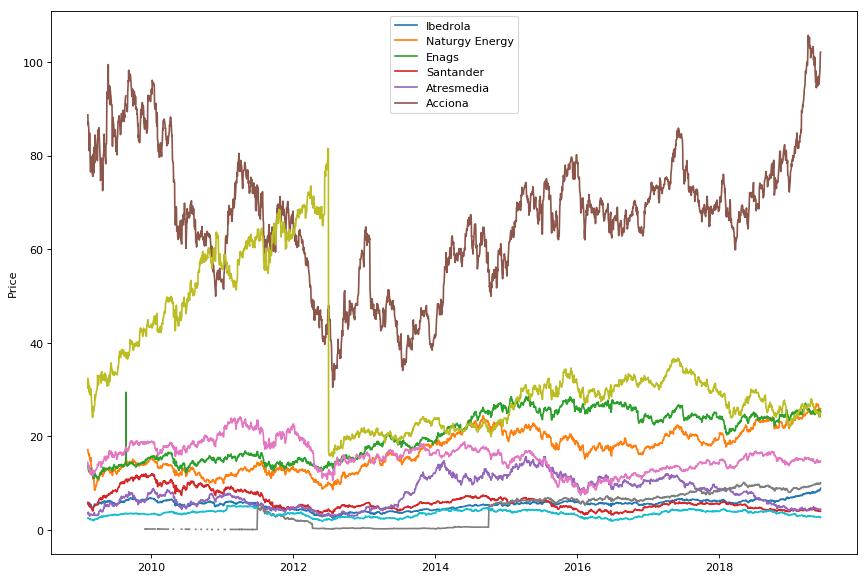

In [5]:
original_df.index = pd.to_datetime(original_df.index)
plt.figure(num=None, figsize=(13, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(original_df.iloc[:,0:10])
plt.legend(['Ibedrola',"Naturgy Energy","Enags", "Santander","Atresmedia", "Acciona" ])
plt.ylabel("Price")

In [6]:
np.mean((original_df.describe().iloc[0,:]))
original_df.describe()

,iberdrola,naturgy-energy,enags,santander,atresmedia,acciona,repsol,colonial,inditex,caixabank,...,bme,bbva,grifols,siemens-gamesa,telefnica,abengoa,bankinter,mapfre,indra,red-elctrica
count,2604.000000,2604.000000,2604.000000,2604.000000,2601.000000,2603.000000,2604.000000,2242.000000,2604.000000,2570.000000,...,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2603.000000,2604.000000,2604.000000,2604.000000,2604.000000
mean,5.396829,16.967475,20.381432,6.027944,7.908727,66.590903,15.634099,4.306224,34.989477,3.463835,...,25.531759,7.360235,19.051526,9.852517,11.852211,5.840077,5.847859,2.606791,11.441373,28.540112
std,1.063294,4.257420,5.047747,1.990627,3.165302,14.117735,3.194638,3.528028,14.793311,0.737223,...,5.980988,1.830331,5.963078,5.207956,3.424996,7.563162,2.032695,0.383327,2.353781,11.249886
min,2.479000,8.500000,10.890000,3.190000,2.860000,30.470000,7.384000,0.060000,15.580000,1.811000,...,13.170000,4.191000,8.010000,1.006000,6.633000,0.010600,1.350000,1.323000,6.103000,14.980000
25%,4.679000,13.019250,15.198750,4.588000,4.940000,59.140000,13.581250,0.318500,23.850000,2.829000,...,20.261500,5.971000,12.831000,5.510000,9.240250,0.448500,4.477750,2.370000,9.748750,18.389250
50%,5.621500,17.522500,21.522500,5.491000,7.655000,67.560000,15.738000,5.750000,30.130000,3.500000,...,25.750000,7.196000,19.300000,9.839500,10.937000,2.454000,6.368000,2.634000,11.097500,29.790000
75%,6.080000,20.441250,25.010000,6.848250,10.570000,74.535000,17.483250,7.064000,42.552500,4.020000,...,29.496250,8.457500,23.910250,13.571250,13.852500,4.626000,7.300000,2.880000,13.140000,36.550000
max,8.870000,26.950000,29.400000,11.980000,15.670000,105.700000,24.090000,10.140000,81.530000,5.240000,...,43.300000,13.220000,33.840000,20.880000,19.800000,24.000000,9.520000,3.605000,17.820000,64.900000


In [7]:
((original_df.iloc[-1,:]-original_df.iloc[0,:])/original_df.iloc[0,:]).mean()

0.10817802806865963

In [8]:
pct_df = original_df.pct_change()
(((pct_df.mean()).mean()+1)** 250)

1.5097953090956915

Text(0, 0.5, 'Return')

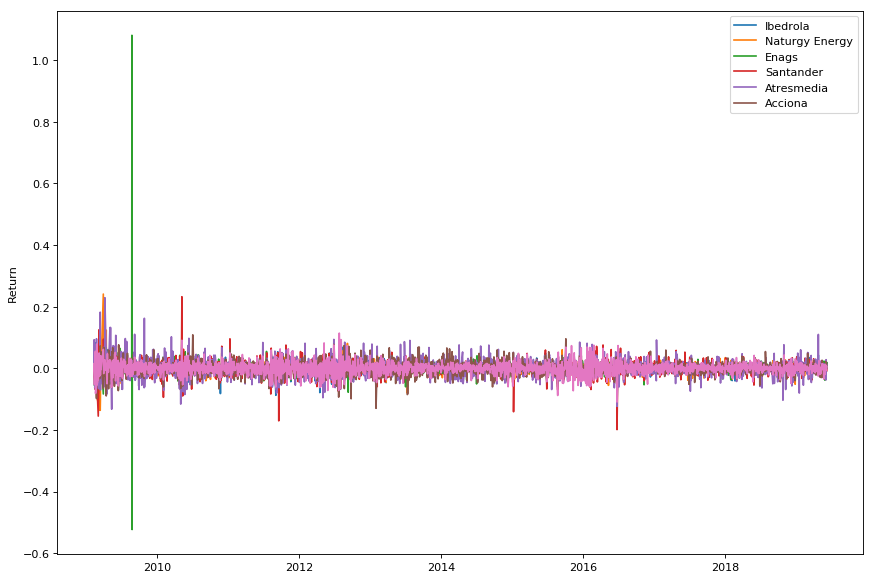

In [9]:
pct_df.index = pd.to_datetime(pct_df.index)
plt.figure(num=None, figsize=(13, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(pct_df.iloc[:,0:7])
plt.legend(['Ibedrola',"Naturgy Energy","Enags", "Santander","Atresmedia", "Acciona" ])
plt.ylabel("Return")
#original_df
#current

In [10]:
#Function to get rid of outliers so histogram looks acceptable
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    result = a[np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))]
    
    return result.tolist()
#Taken from https://gist.github.com/vishalkuo/f4aec300cf6252ed28d3

In [11]:
all_data = pct_df.stack().to_list()
data_mean= np.mean(all_data)
data_std = np.std(all_data)
kurtosis(all_data)

67798.65542647796

In [12]:
all_data = pct_df.stack().to_list()
all_data = np.asarray(all_data)
#all_data[np.argsort(all_data)[-100:]]
all_data = removeOutliers(all_data,5)
y = np.random.normal(loc=data_mean, scale=data_std, size=1000)


In [13]:
hist,bin_edges = np.histogram(all_data, bins = 450, density = False)

hist2,bin_edges2 = np.histogram(y, bins = 450, density = False)


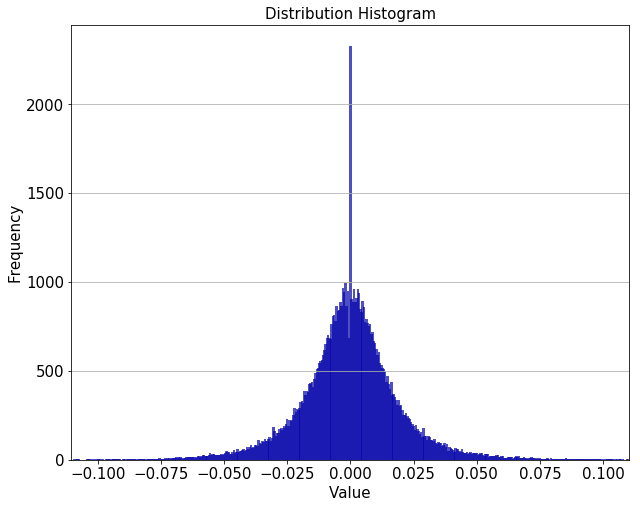

In [14]:
#plt.hist(all_data,bins=100)

plt.figure(figsize=[10,8])
plt.bar(bin_edges[:-1], hist, width = 0.001, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=1)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution Histogram',fontsize=15)

plt.show()

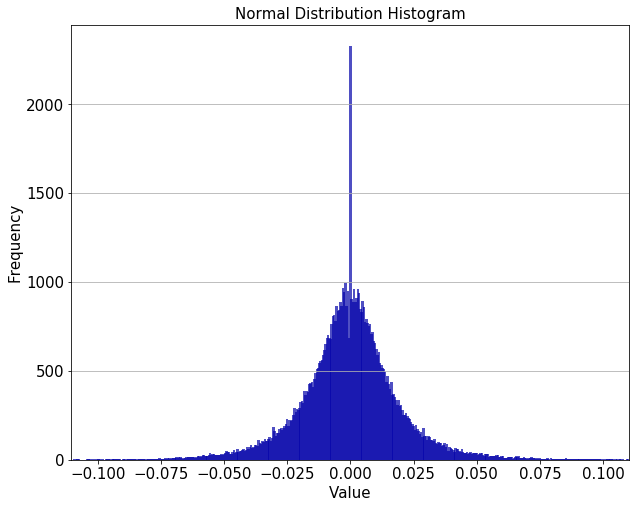

In [15]:
#plt.figure(num=None, figsize=(13, 9), dpi=80, facecolor='w', edgecolor='k')

#plt.hist(all_data,bins=100)

plt.figure(figsize=[10,8])

plt.bar(bin_edges[:-1], hist, width = 0.001, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=1)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

In [16]:
original_df.head()

,iberdrola,naturgy-energy,enags,santander,atresmedia,acciona,repsol,colonial,inditex,caixabank,...,bme,bbva,grifols,siemens-gamesa,telefnica,abengoa,bankinter,mapfre,indra,red-elctrica
Date,,,,,,,,,,,,,,,,,,,,,
2009-02-11,5.59,17.14,13.71,5.87,3.45,88.70,14.42,NaN,32.35,2.49,...,16.77,7.17,13.05,13.27,14.33,12.97,7.14,2.28,15.64,32.78
2009-02-12,5.43,16.55,13.81,5.71,3.45,86.55,13.68,NaN,30.23,2.49,...,16.87,6.85,13.18,12.79,13.90,12.40,7.08,2.26,15.01,33.10
2009-02-13,5.50,16.41,13.06,5.72,3.77,87.15,13.90,NaN,31.94,2.54,...,16.50,6.88,12.95,13.25,14.59,12.72,7.23,2.15,15.53,31.80
2009-02-16,5.35,16.02,12.38,5.49,3.53,85.50,13.61,NaN,30.85,2.44,...,16.23,6.54,13.18,13.07,14.30,12.56,7.03,2.08,15.63,32.01
2009-02-17,5.66,16.30,13.02,5.12,3.33,81.40,13.15,NaN,29.50,2.38,...,15.56,6.01,13.19,12.63,13.87,11.90,7.08,2.03,15.28,31.06


# Data Prepocessing Step

# Formula 

$$Vol = 100 * \sqrt{\frac{252}{n}\sum^{n}_{t=1}R^2_t}$$ 
$$R_t = Ln\frac{P_t}{P_{t-1}}$$

In [17]:
def create_data(df, look_back, predict_next, stocks):
    return_df = pd.DataFrame()
    df_len = len(df)
    log_pow_df = np.log(df).diff().pow(2)
    direction_df = df.pct_change()
    h = 0
    stocks_len = len(stocks)
    print("Part 1 Start")
    for stock in stocks:       
        direction_df[stock].loc[direction_df[stock] > 0] = 1
        direction_df[stock].loc[direction_df[stock] < 0] = -1
        h = h+1
        print("Part 1, Stock " + str(h) + " out of "+ str(stocks_len)+" processed" )
    h = 0
    print("Part 2 Start")
    for stock in stocks:
        h = h+1
        for i in range(0,df_len-(predict_next+look_back)):
            x_data = log_pow_df[stock].rolling(1).sum()[i:i+look_back]**(1/2)*(252)**(1/2)*100 *  direction_df[stock][i:i+look_back]
            y_data = log_pow_df[stock].rolling(predict_next).sum()[i+look_back +predict_next ]**(1/2)*(252/predict_next)**(1/2)*100        
            return_df = pd.concat([return_df,pd.DataFrame(np.concatenate((y_data, x_data), axis=None))],axis=1)          
        print("Part 2, Stock " + str(h) + " out of "+ str(stocks_len)+" processed" )
    return_df.dropna(axis=1,inplace=True)
    print("Finihed!")
    return return_df.transpose()

In [18]:
def benchmark(df, look_back, predict_next, stocks):
    return_df = pd.DataFrame()
    df_len = len(df)
    log_pow_df = np.log(df).diff().pow(2)
    direction_df = df.pct_change()
    h = 0
    stocks_len = len(stocks)
    print("Part 1 Start")
    for stock in stocks:       
        direction_df[stock].loc[direction_df[stock] > 0] = 1
        direction_df[stock].loc[direction_df[stock] < 0] = -1
        h = h+1
        print("Part 1, Stock " + str(h) + " out of "+ str(stocks_len)+" processed" )
    h = 0
    print("Part 2 Start")
    for stock in stocks:
        h = h+1
        for i in range(0,df_len-(predict_next+look_back)):
            x_pred = log_pow_df[stock].rolling(look_back).sum()[i+look_back]**(1/2)*(252/look_back)**(1/2)*100 

            y_data = log_pow_df[stock].rolling(predict_next).sum()[i+look_back +predict_next ]**(1/2)*(252/predict_next)**(1/2)*100        
            return_df = pd.concat([return_df,pd.DataFrame(np.concatenate((y_data, x_pred), axis=None))],axis=1)          
        print("Part 2, Stock " + str(h) + " out of "+ str(stocks_len)+" processed" )
    return_df.dropna(axis=1,inplace=True)
    print("Finihed!")
    return return_df.transpose()

In [19]:

test = original_df.columns.values
benchmark_df =  benchmark(original_df,20,5,test)

Part 1 Start
Part 1, Stock 1 out of 27 processed
Part 1, Stock 2 out of 27 processed
Part 1, Stock 3 out of 27 processed
Part 1, Stock 4 out of 27 processed
Part 1, Stock 5 out of 27 processed
Part 1, Stock 6 out of 27 processed
Part 1, Stock 7 out of 27 processed
Part 1, Stock 8 out of 27 processed
Part 1, Stock 9 out of 27 processed
Part 1, Stock 10 out of 27 processed
Part 1, Stock 11 out of 27 processed
Part 1, Stock 12 out of 27 processed
Part 1, Stock 13 out of 27 processed
Part 1, Stock 14 out of 27 processed
Part 1, Stock 15 out of 27 processed
Part 1, Stock 16 out of 27 processed
Part 1, Stock 17 out of 27 processed
Part 1, Stock 18 out of 27 processed
Part 1, Stock 19 out of 27 processed
Part 1, Stock 20 out of 27 processed
Part 1, Stock 21 out of 27 processed
Part 1, Stock 22 out of 27 processed
Part 1, Stock 23 out of 27 processed
Part 1, Stock 24 out of 27 processed
Part 1, Stock 25 out of 27 processed
Part 1, Stock 26 out of 27 processed
Part 1, Stock 27 out of 27 process

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in double_scalars


Part 2, Stock 23 out of 27 processed
Part 2, Stock 24 out of 27 processed
Part 2, Stock 25 out of 27 processed
Part 2, Stock 26 out of 27 processed
Part 2, Stock 27 out of 27 processed
Finihed!


In [20]:
def rmse (y_test, Y_pred):   
    return (sum(((y_test.values - Y_pred[0])**2)/len(y_test)))**(1/2)
def mad(y_test, Y_pred):
    return ((sum(abs(y_test.values - Y_pred[0])))/len(Y_pred))
    


In [22]:
print("RMSE = " + str(rmse(benchmark_df.iloc[:,0], benchmark_df.iloc[:,1])))
print("MAD = " + str(mad(benchmark_df.iloc[:,0], benchmark_df.iloc[:,1])))


RMSE = 46.43776229877243
MAD = 13.946495918599306


In [23]:
# part data
#test = ["santander","caixabank","colonial"]
#test = ["santander"]
#All data
test = original_df.columns.values
final_df =  create_data(original_df,20,5,test)

Part 1 Start
Part 1, Stock 1 out of 27 processed
Part 1, Stock 2 out of 27 processed
Part 1, Stock 3 out of 27 processed
Part 1, Stock 4 out of 27 processed
Part 1, Stock 5 out of 27 processed
Part 1, Stock 6 out of 27 processed
Part 1, Stock 7 out of 27 processed
Part 1, Stock 8 out of 27 processed
Part 1, Stock 9 out of 27 processed
Part 1, Stock 10 out of 27 processed
Part 1, Stock 11 out of 27 processed
Part 1, Stock 12 out of 27 processed
Part 1, Stock 13 out of 27 processed
Part 1, Stock 14 out of 27 processed
Part 1, Stock 15 out of 27 processed
Part 1, Stock 16 out of 27 processed
Part 1, Stock 17 out of 27 processed
Part 1, Stock 18 out of 27 processed
Part 1, Stock 19 out of 27 processed
Part 1, Stock 20 out of 27 processed
Part 1, Stock 21 out of 27 processed
Part 1, Stock 22 out of 27 processed
Part 1, Stock 23 out of 27 processed
Part 1, Stock 24 out of 27 processed
Part 1, Stock 25 out of 27 processed
Part 1, Stock 26 out of 27 processed
Part 1, Stock 27 out of 27 process

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in double_scalars


Part 2, Stock 23 out of 27 processed
Part 2, Stock 24 out of 27 processed
Part 2, Stock 25 out of 27 processed
Part 2, Stock 26 out of 27 processed
Part 2, Stock 27 out of 27 processed
Finihed!


In [24]:
len(final_df)

62185

In [25]:
np.mean(np.mean(np.abs(final_df)))

24.38868899880395

In [26]:
from sklearn.model_selection import train_test_split
final_df.reset_index(inplace=True,drop=True)

In [27]:
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,34.511554,-46.099814,20.333591,-43.895445,89.416866,-104.322617,126.602994,-79.389081,-83.569336,74.823029,...,-180.027493,-49.281809,73.360614,60.290187,-3.290055,29.367861,130.293669,17.770157,-44.804031,73.985933
1,32.666084,20.333591,-43.895445,89.416866,-104.322617,126.602994,-79.389081,-83.569336,74.823029,-90.220344,...,-49.281809,73.360614,60.290187,-3.290055,29.367861,130.293669,17.770157,-44.804031,73.985933,-2.894168
2,34.875995,-43.895445,89.416866,-104.322617,126.602994,-79.389081,-83.569336,74.823029,-90.220344,-180.027493,...,73.360614,60.290187,-3.290055,29.367861,130.293669,17.770157,-44.804031,73.985933,-2.894168,-26.287734
3,35.901240,89.416866,-104.322617,126.602994,-79.389081,-83.569336,74.823029,-90.220344,-180.027493,-49.281809,...,60.290187,-3.290055,29.367861,130.293669,17.770157,-44.804031,73.985933,-2.894168,-26.287734,-5.901311
4,35.767119,-104.322617,126.602994,-79.389081,-83.569336,74.823029,-90.220344,-180.027493,-49.281809,73.360614,...,-3.290055,29.367861,130.293669,17.770157,-44.804031,73.985933,-2.894168,-26.287734,-5.901311,2.953398


# Splitting data into train/validation/test sets

In [28]:
def split_data_stocks(df):
    return df.iloc[:,1:], df[0]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:], final_df[0], test_size=0.3, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size=0.3)

# Uplad S3

In [30]:
import sagemaker
import os
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri

session = sagemaker.Session()
role = get_execution_role()

In [31]:
# This is our local data directory. We need to make sure that it exists.
data_dir = '../data_processed/stocks'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [32]:
X_test.to_csv(os.path.join(data_dir, 'test.csv'), header=False, index=False)

pd.concat([Y_val, X_val], axis=1).to_csv(os.path.join(data_dir, 'validation.csv'), header=False, index=False)
pd.concat([y_train, X_train], axis=1).to_csv(os.path.join(data_dir, 'train.csv'), header=False, index=False)

In [33]:
prefix = 'mlfinal'

val_location = session.upload_data(os.path.join(data_dir, 'validation.csv'), key_prefix=prefix)
test_location = session.upload_data(os.path.join(data_dir, 'test.csv'), key_prefix=prefix)
train_location = session.upload_data(os.path.join(data_dir, 'train.csv'), key_prefix=prefix)

# XGBoost Reg:Linear

In [34]:
# As stated above, we use this utility method to construct the image name for the training container.
container = get_image_uri(session.boto_region_name, 'xgboost','0.90-1')

# Now that we know which container to use, we can construct the estimator object.
xgb = sagemaker.estimator.Estimator(container, # The name of the training container
                                    role,      # The IAM role to use (our current role in this case)
                                    train_instance_count=1, # The number of instances to use for training
                                    train_instance_type='ml.m4.xlarge', # The type of instance ot use for training
                                    output_path='s3://{}/{}/output'.format(session.default_bucket(), prefix),
                                                                        # Where to save the output (the model artifacts)
                                    sagemaker_session=session) # The current SageMaker session

In [35]:
xgb.set_hyperparameters(max_depth=3,
                        eta=0.06166,
                        gamma=5.0833,
                        min_child_weight=3,
                        subsample=0.8855,
                        objective='reg:linear',
                        early_stopping_rounds=10,
                        num_round=550)

In [37]:
s3_input_train = sagemaker.s3_input(s3_data=train_location, content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data=val_location, content_type='csv')

xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})
#xgb.fit({'train': s3_input_train})

2020-02-02 17:14:24 Starting - Starting the training job...
2020-02-02 17:14:27 Starting - Launching requested ML instances......
2020-02-02 17:15:30 Starting - Preparing the instances for training......
2020-02-02 17:16:34 Downloading - Downloading input data...
2020-02-02 17:17:20 Training - Downloading the training image...
2020-02-02 17:17:51 Uploading - Uploading generated training modelINFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[17:17:42] 43529x20 matrix with 857521 entries loaded from /opt/ml/input/data/train?format=

In [38]:
xgb_transformer = xgb.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')

In [39]:
xgb_transformer.transform(test_location, content_type='text/csv', split_type='Line')

In [40]:
xgb_transformer.wait()

.........................[2020-02-02 17:22:31 +0000] [15] [INFO] Starting gunicorn 19.10.0
[2020-02-02 17:22:31 +0000] [15] [INFO] Listening at: unix:/tmp/gunicorn.sock (15)
[2020-02-02 17:22:31 +0000] [15] [INFO] Using worker: gevent
[2020-02-02 17:22:31 +0000] [22] [INFO] Booting worker with pid: 22
[2020-02-02 17:22:32 +0000] [23] [INFO] Booting worker with pid: 23
[2020-02-02 17:22:32 +0000] [27] [INFO] Booting worker with pid: 27
[2020-02-02 17:22:32 +0000] [28] [INFO] Booting worker with pid: 28
[2020-02-02:17:22:50:INFO] No GPUs detected (normal if no gpus installed)
169.254.255.130 - - [02/Feb/2020:17:22:50 +0000] "GET /ping HTTP/1.1" 200 0 "-" "Go-http-client/1.1"
169.254.255.130 - - [02/Feb/2020:17:22:50 +0000] "GET /execution-parameters HTTP/1.1" 200 84 "-" "Go-http-client/1.1"
[2020-02-02:17:22:51:INFO] No GPUs detected (normal if no gpus installed)
[2020-02-02:17:22:51:INFO] Determined delimiter of CSV input is ','
[2020-02-02:17:22:51:INFO] Determined delimiter of CSV inp

In [41]:
!aws s3 cp --recursive $xgb_transformer.output_path $data_dir

download: s3://sagemaker-us-east-1-930398515265/sagemaker-xgboost-2020-02-02-17-18-36-826/test.csv.out to ../data_processed/stocks/test.csv.out


In [43]:
Y_pred = pd.read_csv(os.path.join(data_dir, 'test.csv.out'), header=None)

Text(0.5, 1.0, 'Vol vs Predicted Vol')

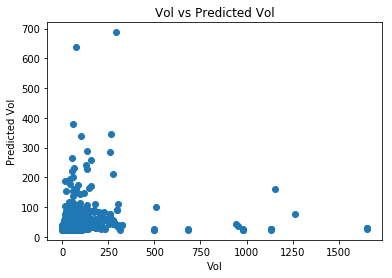

In [44]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Vol")
plt.ylabel("Predicted Vol")
plt.title("Vol vs Predicted Vol")

In [45]:
def rmse (y_test, Y_pred):   
    return (sum(((y_test.values - Y_pred[0])**2)/len(y_test)))**(1/2)
def mad(y_test, Y_pred):
    return ((sum(abs(y_test.values - Y_pred[0])))/len(Y_pred))
    

In [48]:
from scipy.stats import kde


In [49]:
nbins=300
#y_test, Y_pred
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[y_test.min():y_test.max():nbins*1j, Y_pred.min():Y_pred.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 # Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.show()
# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
plt.show()



NameError: name 'x' is not defined

In [46]:
print("RMSE = " + str(rmse(y_test, Y_pred)))
print("MAD = " + str(mad(y_test, Y_pred)))


RMSE = 38.873235940730865
MAD = 12.532685183483041


# XGBoost  Hyperparamteter tuning

In [ ]:
# Now that we know which container to use, we can construct the estimator object.
xgbt = sagemaker.estimator.Estimator(container, # The name of the training container
                                    role,      # The IAM role to use (our current role in this case)
                                    train_instance_count=1, # The number of instances to use for training
                                    train_instance_type='ml.m4.4xlarge', # The type of instance ot use for training
                                    output_path='s3://{}/{}/output'.format(session.default_bucket(), prefix),
                                                                        # Where to save the output (the model artifacts)
                                    sagemaker_session=session) # The current SageMaker session

In [ ]:
xgbt.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        objective='reg:squarederror',
                        early_stopping_rounds=10,
                        num_round=450)

In [ ]:
from sagemaker.tuner import IntegerParameter, ContinuousParameter, HyperparameterTuner

xgb_hyperparameter_tuner = HyperparameterTuner(estimator = xgbt, # The estimator object to use as the basis for the training jobs.
                                               objective_metric_name = 'validation:rmse', # The metric used to compare trained models.
                                               objective_type = 'Minimize', # Whether we wish to minimize or maximize the metric.
                                               max_jobs = 40, # The total number of models to train
                                               max_parallel_jobs = 4, # The number of models to train in parallel
                                               hyperparameter_ranges = {
                                                    'max_depth': IntegerParameter(3, 12),
                                                    'eta'      : ContinuousParameter(0.05, 0.5),
                                                    'min_child_weight': IntegerParameter(2, 8),
                                                    'subsample': ContinuousParameter(0.5, 0.9),
                                                    'gamma': ContinuousParameter(0, 10),
                                               })

In [ ]:
s3_input_train = sagemaker.s3_input(s3_data=train_location, content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data=val_location, content_type='csv')

xgb_hyperparameter_tuner.fit({'train': s3_input_train, 'validation': s3_input_validation})
#xgbt.fit({'train': s3_input_train})

In [ ]:
xgb_hyperparameter_tuner.wait()

In [ ]:
xgb_hyperparameter_tuner.best_training_job()

In [ ]:
xgb_attached = sagemaker.estimator.Estimator.attach(xgb_hyperparameter_tuner.best_training_job())

In [ ]:
xgb_transformert = xgb_attached.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')

In [ ]:
xgb_transformert.transform(test_location, content_type='text/csv', split_type='Line')

In [ ]:
xgb_transformert.wait()

In [ ]:
!aws s3 cp --recursive $xgb_transformert.output_path $data_dir

In [ ]:
Y_pred = pd.read_csv(os.path.join(data_dir, 'test.csv.out'), header=None)

In [ ]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Vol")
plt.ylabel("Predicted Vol")
plt.title("Vol vs Predicted Vol")

In [ ]:
print("RMSE = " + str(rmse(y_test, Y_pred)))
print("MAD = " + str(mad(y_test, Y_pred)))


# PyTorch

In [ ]:
import pandas as pd
import boto3
import sagemaker

In [ ]:
# session and role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

# create an S3 bucket
bucket = sagemaker_session.default_bucket()

In [ ]:
from sagemaker.pytorch import PyTorch
# your import and estimator code, here

output_path = 's3://{}/{}'.format(bucket, prefix)

# instantiate a pytorch estimator
estimator = PyTorch(entry_point='train.py',
                    source_dir='source_pytorch', # this should be just "source" for your code
                    role=role,
                    framework_version='1.0',
                    train_instance_count=1,
                    train_instance_type='ml.c4.xlarge',
                    output_path=output_path,
                    sagemaker_session=sagemaker_session,
                    hyperparameters={
                        'input_dim': 20,  # num of features
                        'hidden_dim': 20,
                        'output_dim': 1,
                        'epochs': 250 # could change to higher
                    })

In [ ]:
%%time 
# Train your estimator on S3 training data

estimator.fit({'train': s3_input_train})

In [ ]:
%%time

from sagemaker.pytorch import PyTorchModel

model = PyTorchModel(model_data=estimator.model_data,
                     role = role,
                     framework_version='1.0',
                     entry_point='predict.py',
                     source_dir='source_pytorch')

In [ ]:
predictor = model.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

In [ ]:
test_y_preds = (predictor.predict(X_val)))


# DEEP AR NOT

In [ ]:
#original_df
#current
def create_data(df, look_back, predict_next, stocks):
    df.index = pd.to_datetime(df.index)
    return_df = pd.DataFrame()
    df_len = len(df)
    log_pow_df = np.log(df).diff().pow(2)
    direction_df = df.pct_change()
    h = 0
    stocks_len = len(stocks)
    print("Part 1 Start")
    for stock in stocks:       
        direction_df[stock].loc[direction_df[stock] > 0] = 1
        direction_df[stock].loc[direction_df[stock] < 0] = -1
        h = h+1
        print("Part 1, Stock " + str(h) + " out of "+ str(stocks_len)+" processed" )
    h = 0
    print("Part 2 Start")
    for stock in stocks:
        h = h+1
        for i in range(0,df_len-(predict_next+look_back)):
            x_data = log_pow_df[stock].rolling(1).sum()[i:i+look_back]**(1/2)*(252)**(1/2)*100 *  direction_df[stock][i:i+look_back]
            y_data = log_pow_df[stock].rolling(predict_next).sum()[i+look_back +predict_next ]**(1/2)*(252/predict_next)**(1/2)*100        
            return_df = pd.concat([return_df,pd.DataFrame(np.concatenate((y_data, x_data), axis=None))],axis=1)          
        print("Part 2, Stock " + str(h) + " out of "+ str(stocks_len)+" processed" )
    return_df.dropna(axis=1,inplace=True)
    print("Finihed!")
    return return_df.transpose()

In [ ]:
# part data
stock = "caixabank"
#test = ["santander","caixabank","colonial"]
#test = ["santander"]


# DEEP AR NOT
look_back = 20
predict_next = 5
i = 40
df = original_df
df.index = pd.to_datetime(df.index)
return_df = pd.DataFrame()
log_pow_df = np.log(df).diff().pow(2)
direction_df = df.pct_change()
direction_df[stock].loc[direction_df[stock] > 0] = 1
direction_df[stock].loc[direction_df[stock] < 0] = -1
(log_pow_df[stock].rolling(1).sum()[i:i+look_back]**(1/2)*(252)**(1/2)*100 *  direction_df[stock][i:i+look_back])

$$MAD= \sum_{i=1}^{n}\frac{|{y}_i-y_i|}{n}$$

$$RMSE =\sqrt{ \sum_{i=1}^{n}\frac{(\hat{y}_i-y_i)^2}{n}}$$